In [338]:
import pandas as pd
import numpy as np

In [339]:
data = pd.read_csv('/Users/macbook/Desktop/Data1Science/Machine_Learning/Лекция9/house-prices-advanced-regression-techniques/sample_submission.csv')

In [340]:
data.head()

,Id,SalePrice
0,1461,169277.052498
1,1462,187758.393989
2,1463,183583.683570
3,1464,179317.477511
4,1465,150730.079977


In [341]:
data_train = pd.read_csv('/Users/macbook/Desktop/Data1Science/Machine_Learning/Лекция9/house-prices-advanced-regression-techniques/train.csv')

In [342]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

Рассмотрим все категориальные признаки.

In [343]:
data_train.MiscFeature.value_counts()

Shed    49
Othr     2
Gar2     2
TenC     1
Name: MiscFeature, dtype: int64

Street  
Utilities  
Condition2   
RoofMatl  
Heating  
GarageQual  
GarageCond  
PoolQC  
MiscFeature  
- малоиформативены   
id не нужен  

In [344]:
data_train.drop(['Street', 'Utilities', 'Condition2', 'RoofMatl', 'Heating', 'GarageQual', 'GarageCond', 'PoolQC', 'MiscFeature'], axis='columns', inplace=True)

In [345]:
data_train.drop(['Id'], axis='columns', inplace=True)

In [346]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 71 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Alley          91 non-null     object 
 5   LotShape       1460 non-null   object 
 6   LandContour    1460 non-null   object 
 7   LotConfig      1460 non-null   object 
 8   LandSlope      1460 non-null   object 
 9   Neighborhood   1460 non-null   object 
 10  Condition1     1460 non-null   object 
 11  BldgType       1460 non-null   object 
 12  HouseStyle     1460 non-null   object 
 13  OverallQual    1460 non-null   int64  
 14  OverallCond    1460 non-null   int64  
 15  YearBuilt      1460 non-null   int64  
 16  YearRemodAdd   1460 non-null   int64  
 17  RoofStyle      1460 non-null   object 
 18  Exterior

Преобразуем оставшиеся категориальные признаки.

In [347]:
categorical_columns = data_train.columns[data_train.dtypes == 'object']
categorical_columns

Index(['MSZoning', 'Alley', 'LotShape', 'LandContour', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'BldgType', 'HouseStyle',
       'RoofStyle', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual',
       'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinType2', 'HeatingQC', 'CentralAir', 'Electrical',
       'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType',
       'GarageFinish', 'PavedDrive', 'Fence', 'SaleType', 'SaleCondition'],
      dtype='object')

In [348]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()

In [349]:
for var in categorical_columns:
    data_train[var].replace(np.nan, 'Nan', inplace=True)
    data_train.loc[:, var] = labelencoder.fit_transform(data_train.loc[:, var] )

In [350]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 71 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   int64  
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Alley          1460 non-null   int64  
 5   LotShape       1460 non-null   int64  
 6   LandContour    1460 non-null   int64  
 7   LotConfig      1460 non-null   int64  
 8   LandSlope      1460 non-null   int64  
 9   Neighborhood   1460 non-null   int64  
 10  Condition1     1460 non-null   int64  
 11  BldgType       1460 non-null   int64  
 12  HouseStyle     1460 non-null   int64  
 13  OverallQual    1460 non-null   int64  
 14  OverallCond    1460 non-null   int64  
 15  YearBuilt      1460 non-null   int64  
 16  YearRemodAdd   1460 non-null   int64  
 17  RoofStyle      1460 non-null   int64  
 18  Exterior

Удалим пустые значения

In [351]:
data_train.dropna(inplace=True)

In [352]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1121 entries, 0 to 1459
Data columns (total 71 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1121 non-null   int64  
 1   MSZoning       1121 non-null   int64  
 2   LotFrontage    1121 non-null   float64
 3   LotArea        1121 non-null   int64  
 4   Alley          1121 non-null   int64  
 5   LotShape       1121 non-null   int64  
 6   LandContour    1121 non-null   int64  
 7   LotConfig      1121 non-null   int64  
 8   LandSlope      1121 non-null   int64  
 9   Neighborhood   1121 non-null   int64  
 10  Condition1     1121 non-null   int64  
 11  BldgType       1121 non-null   int64  
 12  HouseStyle     1121 non-null   int64  
 13  OverallQual    1121 non-null   int64  
 14  OverallCond    1121 non-null   int64  
 15  YearBuilt      1121 non-null   int64  
 16  YearRemodAdd   1121 non-null   int64  
 17  RoofStyle      1121 non-null   int64  
 18  Exterior

In [353]:
X = data_train[data_train.columns[:-1]]
y = data_train['SalePrice']

In [354]:
from sklearn.ensemble import RandomForestClassifier

clf_rf = RandomForestClassifier(n_estimators=10, max_depth=5, min_samples_leaf=20, max_features=0.5, n_jobs=-1)
clf_rf.fit(X, y)   

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=5, max_features=0.5,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=20, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=-1,
                       oob_score=False, random_state=None, verbose=0,
                       warm_start=False)

In [355]:
import matplotlib.pyplot as plt
import seaborn as sns

No handles with labels found to put in legend.


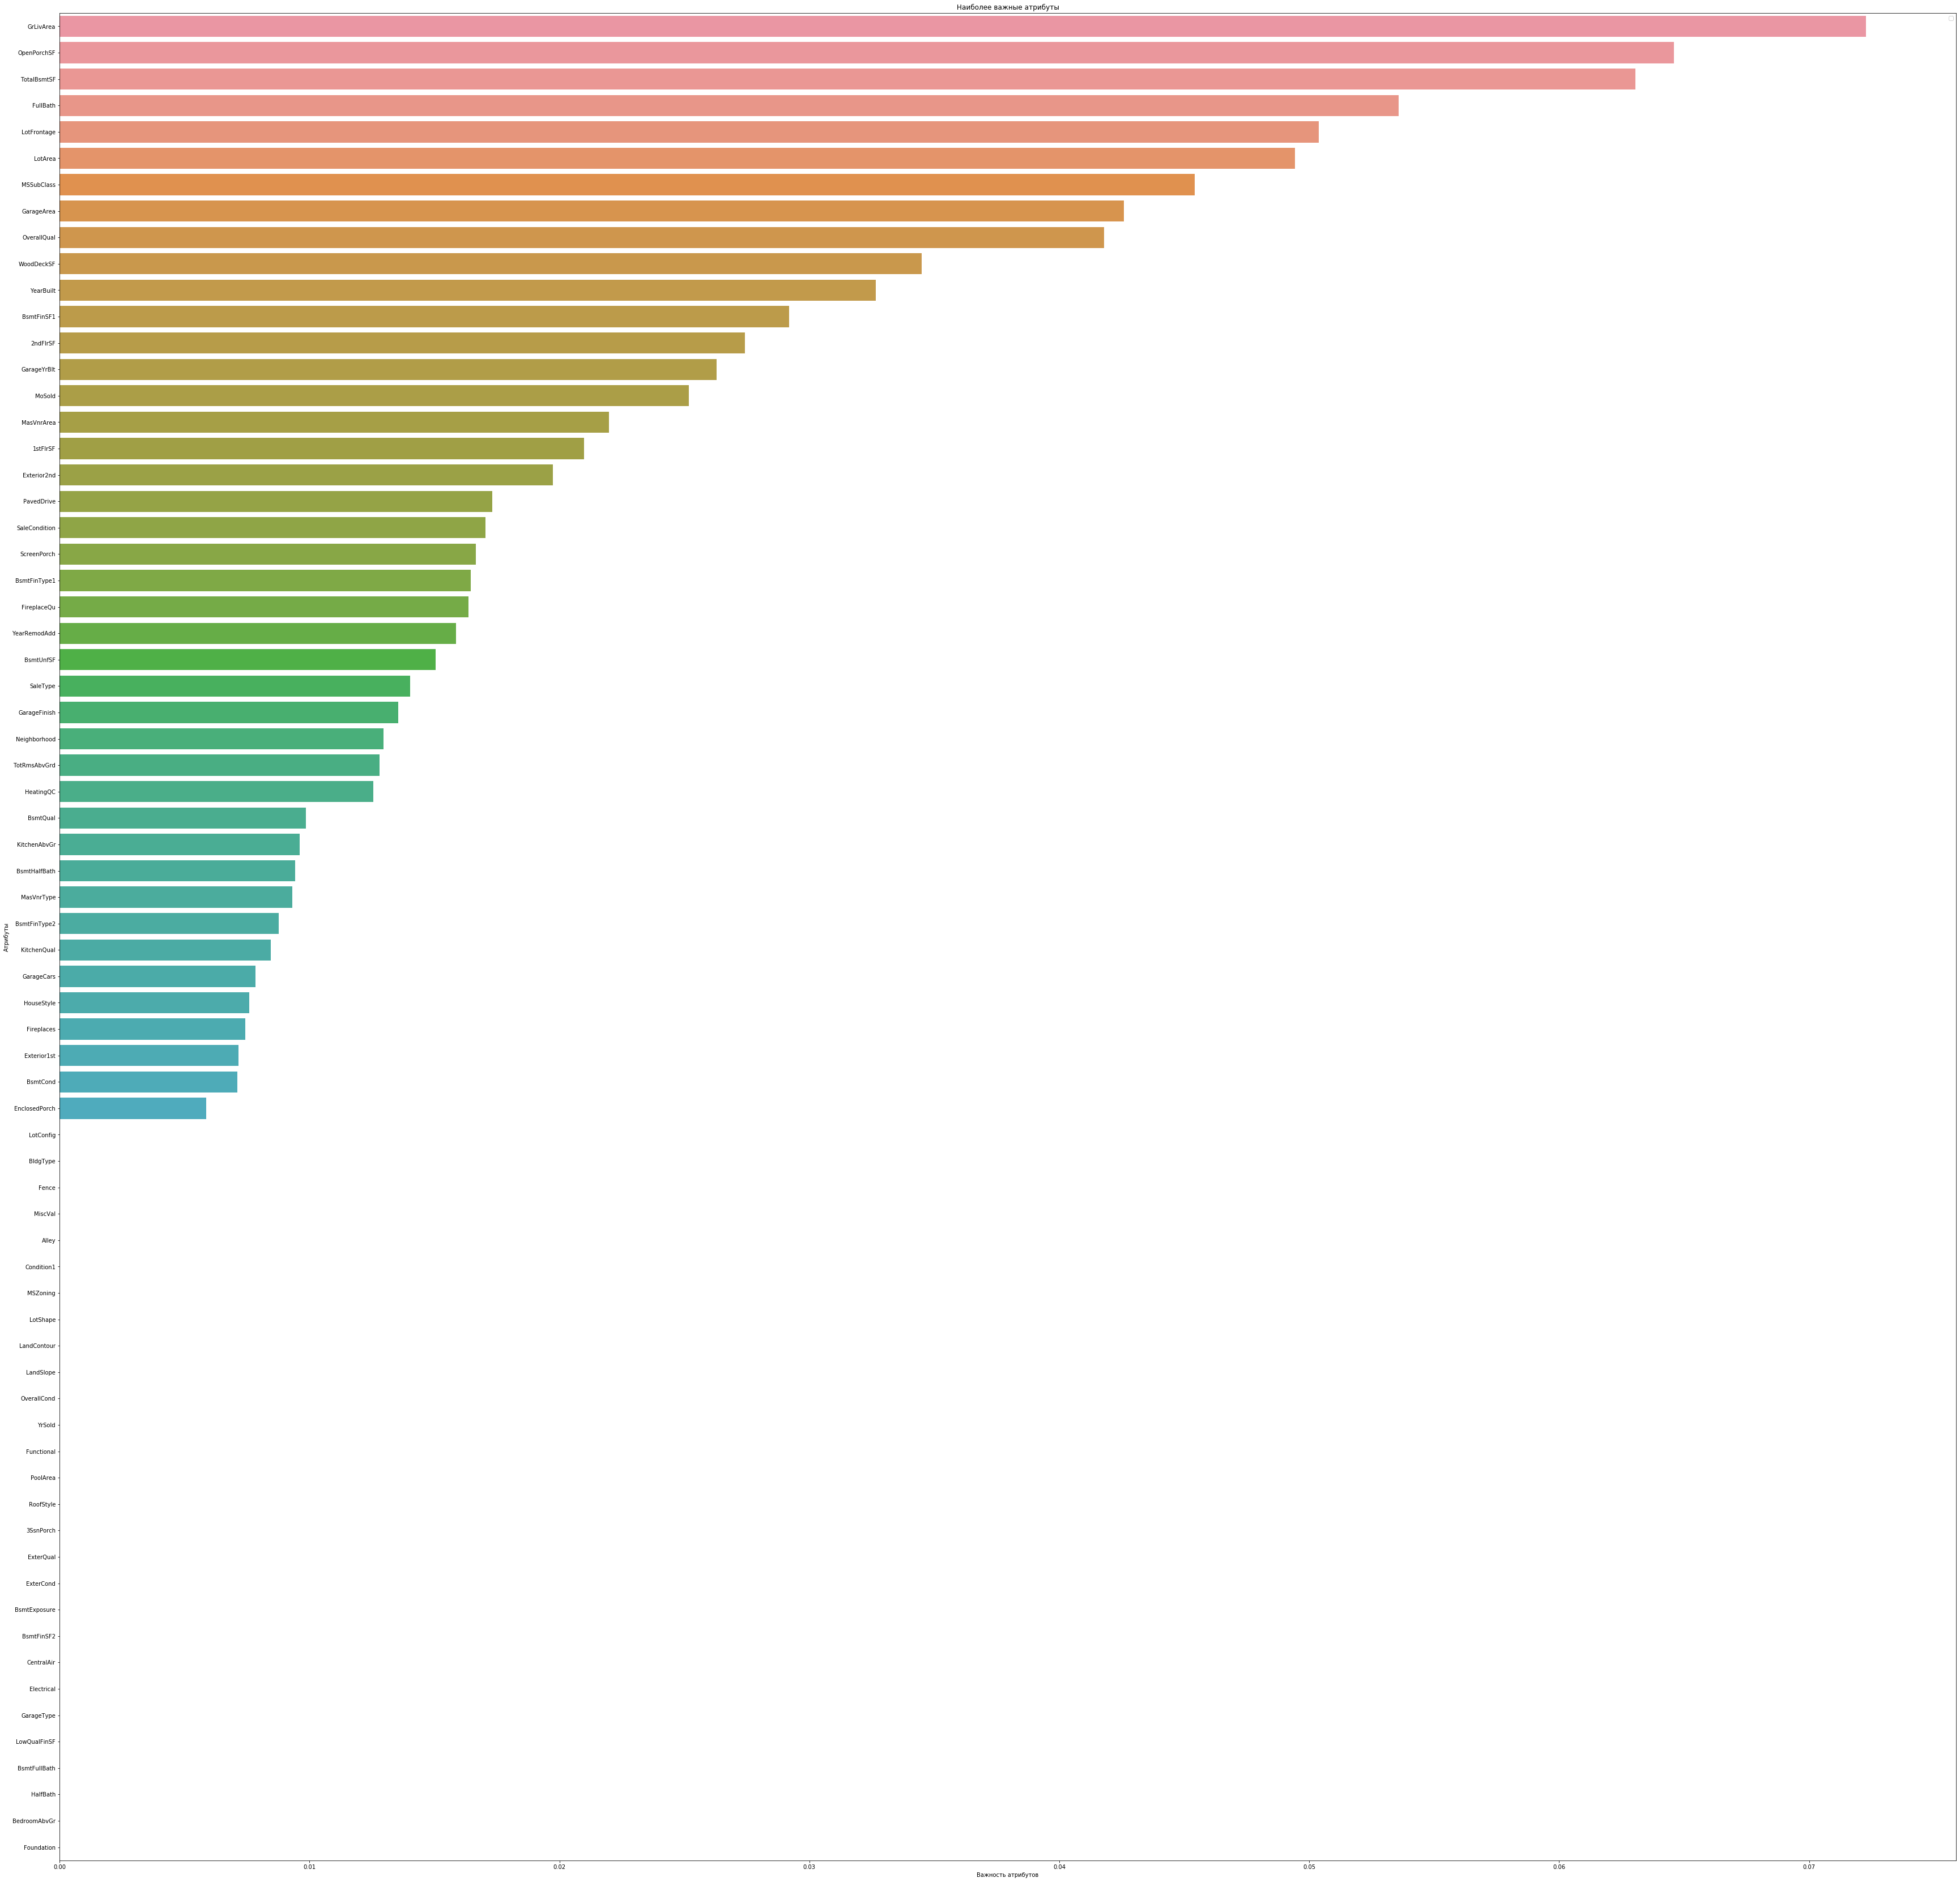

In [356]:
headers = list(X.columns.values)

feature_imp = pd.Series(clf_rf.feature_importances_,index=headers).sort_values(ascending=False)

f, ax = plt.subplots(figsize=(60, 60))
sns.barplot(x=feature_imp, y=feature_imp.index)

plt.xlabel('Важность атрибутов')
plt.ylabel('Атрибуты')
plt.title("Наиболее важные атрибуты")
plt.legend()
plt.show()

In [357]:
feature_imp_n = feature_imp[feature_imp > 0]
len(feature_imp_n)

42

In [358]:
feature_imp_n_index = feature_imp.index[:len(feature_imp_n)]

No handles with labels found to put in legend.


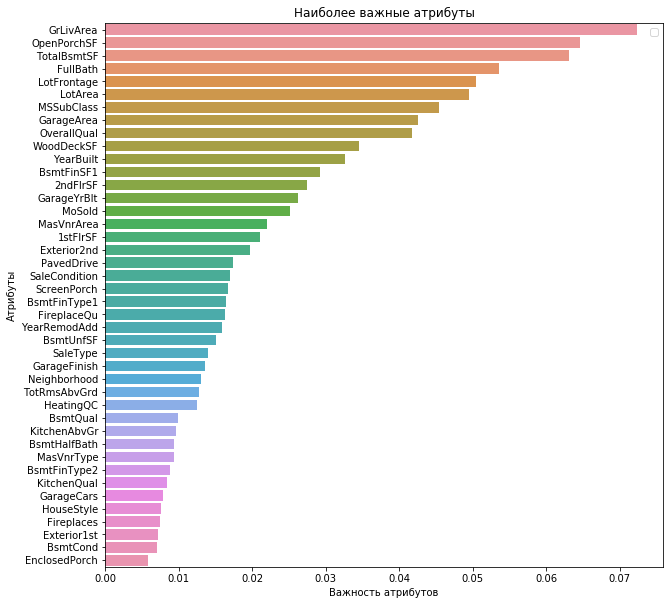

In [359]:
f, ax = plt.subplots(figsize=(10, 10))
sns.barplot(x=feature_imp_n, y=feature_imp_n_index)

plt.xlabel('Важность атрибутов')
plt.ylabel('Атрибуты')
plt.title("Наиболее важные атрибуты")
plt.legend()
plt.show()

In [418]:
data_train_N = pd.read_csv('/Users/macbook/Desktop/Data1Science/Machine_Learning/Лекция9/house-prices-advanced-regression-techniques/train.csv')

In [419]:
data_train_N.drop(['Street', 'Utilities', 'Condition2', 'RoofMatl', 'Heating', 'GarageQual', 'GarageCond', 'PoolQC', 'MiscFeature'], axis='columns', inplace=True)
data_train_N.drop(['Id'], axis='columns', inplace=True)

Делю на 2 фолда, чтобы потом потом еще поделить на 2 и получить 4 фолда, на 3 буду обучать слабых учников, на последнем фолде - модель.

In [420]:
from sklearn.model_selection import train_test_split
X = data_train_N[data_train_N.columns[:-1]]
y = data_train_N['SalePrice'] 
X_train_1, X_train_2, y_train_1, y_train_2 = train_test_split(X, y, test_size=0.5, random_state = 1000)

In [421]:
X_train_3, X_train_4, y_train_3, y_train_4 = train_test_split(X_train_1, y_train_1, test_size=0.5, random_state = 1000)

In [422]:
X_train_1, X_train_2, y_train_1, y_train_2 = train_test_split(X_train_2, y_train_2, test_size=0.5, random_state = 1000)

Теперь есть 4 фолда

RandomForestClassifier первый слабый ученик

In [423]:
from sklearn.ensemble import RandomForestClassifier
RFC= RandomForestClassifier(n_estimators=10, max_depth=5, min_samples_leaf=20, max_features=0.5, n_jobs=-1)

LinearRegression второй слабый ученик

In [424]:
from sklearn.linear_model import LinearRegression
LinR = LinearRegression()

SVM третий слабый ученик

In [425]:
from sklearn import svm
LSVM = svm.SVC(kernel='linear', C=1.0)

Подготовим данные для обучения, будем обучать разные модели на разных признаках, чтобы не мучаться с преобразованием данных. Для SVM и LinearRegression обучаем только на int и float. Для RandomForestClassifier преобразуем по LabelEncoder

In [523]:
X_train_1

In [427]:
categorical_columns = X_train_1.columns[X_train_1.dtypes == 'object']

for var in categorical_columns:
    X_train_1.drop([var], axis='columns', inplace=True)

In [524]:
X_train_2

In [429]:
categorical_columns = X_train_2.columns[X_train_2.dtypes == 'object']

for var in categorical_columns:
    X_train_2.drop([var], axis='columns', inplace=True)

In [525]:
X_train_3

In [431]:
categorical_columns = X_train_3.columns[X_train_3.dtypes == 'object']
categorical_columns

Index(['MSZoning', 'Alley', 'LotShape', 'LandContour', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'BldgType', 'HouseStyle',
       'RoofStyle', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual',
       'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinType2', 'HeatingQC', 'CentralAir', 'Electrical',
       'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType',
       'GarageFinish', 'PavedDrive', 'Fence', 'SaleType', 'SaleCondition'],
      dtype='object')

In [432]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()

In [433]:
for var in categorical_columns:
    X_train_3[var].replace(np.nan, 'Nan', inplace=True)
    X_train_3.loc[:, var] = labelencoder.fit_transform(X_train_3.loc[:, var] )

Для чистки от нулей предварительно соед. X и y

In [448]:
X_1 = pd.concat([X_train_1, y_train_1], axis=1)
X_2 = pd.concat([X_train_2, y_train_2], axis=1)
X_3 = pd.concat([X_train_3, y_train_3], axis=1)

Чистка от нулей

In [449]:
X_1.dropna(inplace=True)
X_2.dropna(inplace=True)
X_3.dropna(inplace=True)

Обучение слабых учеников

In [450]:
X_train_1 = X_1[X_1.columns[:-1]]
y_train_1 = X_1['SalePrice']
Lin_reg =  LinR.fit(X_train_1, y_train_1) 

X_train_2 = X_2[X_1.columns[:-1]]
y_train_2 = X_2['SalePrice']
LSVM.fit(X_train_2, y_train_2) 

X_train_3 = X_3[X_1.columns[:-1]]
y_train_3 = X_3['SalePrice']
RFC.fit(X_train_3, y_train_3)     

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=5, max_features=0.5,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=20, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=-1,
                       oob_score=False, random_state=None, verbose=0,
                       warm_start=False)

Для получения прогнозов, подготовим для Lin_reg, LSVM и RFC данные

In [468]:
X_4 = pd.concat([X_train_4, y_train_4], axis=1)

In [469]:
X_4.dropna(inplace=True)

In [470]:
X_train_4_lin = X_4[X_4.columns[:-1]]
X_train_4_rfc = X_4[X_4.columns[:-1]]
categorical_columns = X_train_4_lin.columns[X_train_4_lin.dtypes == 'object']

for var in categorical_columns:
    X_train_4_lin.drop([var], axis='columns', inplace=True)

In [471]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
for var in categorical_columns:
    X_train_4_rfc[var].replace(np.nan, 'Nan', inplace=True)
    X_train_4_rfc.loc[:, var] = labelencoder.fit_transform(X_train_4_rfc.loc[:, var] )

Прогнозы слабых учеников:

In [473]:
y_pred_lin = Lin_reg.predict(X_train_4_lin)
y_pred_lsvm = LSVM.predict(X_train_4_lin)
y_pred_rfc = RFC.predict(X_train_4_rfc)

In [474]:
len(y_pred_rfc)

283

In [475]:
y_train_4 = X_4['SalePrice']

In [476]:
len(y_train_4)

283

In [498]:
MEGA_df_1 = pd.DataFrame(y_pred_lin)
MEGA_df_2 = pd.DataFrame(y_pred_lsvm)
MEGA_df_3 = pd.DataFrame(y_pred_rfc)
MEGA_X_train = pd.concat([MEGA_df_1, MEGA_df_2, MEGA_df_3], axis=1)

In [499]:
MEGA_X_train

,0,0,0
0,194563.213672,203000,207500
1,206782.191848,152000,139000
2,60346.351829,157000,145000
3,113035.014315,131500,139000
4,356219.007530,255000,335000
...,...,...,...
278,215668.397226,189000,180500
279,274467.508424,236000,335000
280,87971.316191,174000,110000
281,255307.762080,181134,180500


Для обучения сильного ученика можно сделать свою нейронку, но для простоты использую LinearRegression

In [509]:
from sklearn.metrics import mean_absolute_error
reg = LinearRegression().fit(MEGA_X_train, y_train_4)
print(f'Weights: {reg.coef_}')
print(f'Bias: {reg.intercept_}')

pred_values = reg.predict(MEGA_X_train)
print('Error: {}'.format(mean_absolute_error(pred_values, y_train_4)))

Weights: [0.63697449 0.35929573 0.17945181]
Bias: -31124.296928712458
Error: 23413.294464130395


In [522]:
print(f'{23413/255307 * 100:.2f}%') 

9.17%


Относительная ошибка при стоимости жилья в 255307 у.е. составила 9%